In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import seaborn as sns
import math
import plotly.express as px
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn import decomposition, preprocessing, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

In [390]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [391]:
Complete= pd.read_csv("complete_df.csv")
Complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Zone                                                              161 non-null    object 
 1   Disponibilité intérieure volailles                                161 non-null    float64
 2   Importations - Quantité                                           161 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)          161 non-null    float64
 4   Ratio importation volailles / disponibilité interieure volailles  161 non-null    float64
 5   Population 2017                                                   161 non-null    float64
 6   Pop_evo                                                           161 non-null    float64
 7   pib 2017                           

In [392]:
'''sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(15, 6), facecolor=facecolor)

x = sns.boxplot(data=Complete,  orient='h', palette='Set3', linewidth=1.2, fliersize=2, flierprops=dict(marker='o', markersize=4))
lines = ax.get_lines()
categories = ax.get_xticks()
'''

"sns.set(style='whitegrid')\nfacecolor = '#eaeaf2'\nfig, ax = plt.subplots(figsize=(15, 6), facecolor=facecolor)\n\nx = sns.boxplot(data=Complete,  orient='h', palette='Set3', linewidth=1.2, fliersize=2, flierprops=dict(marker='o', markersize=4))\nlines = ax.get_lines()\ncategories = ax.get_xticks()\n"

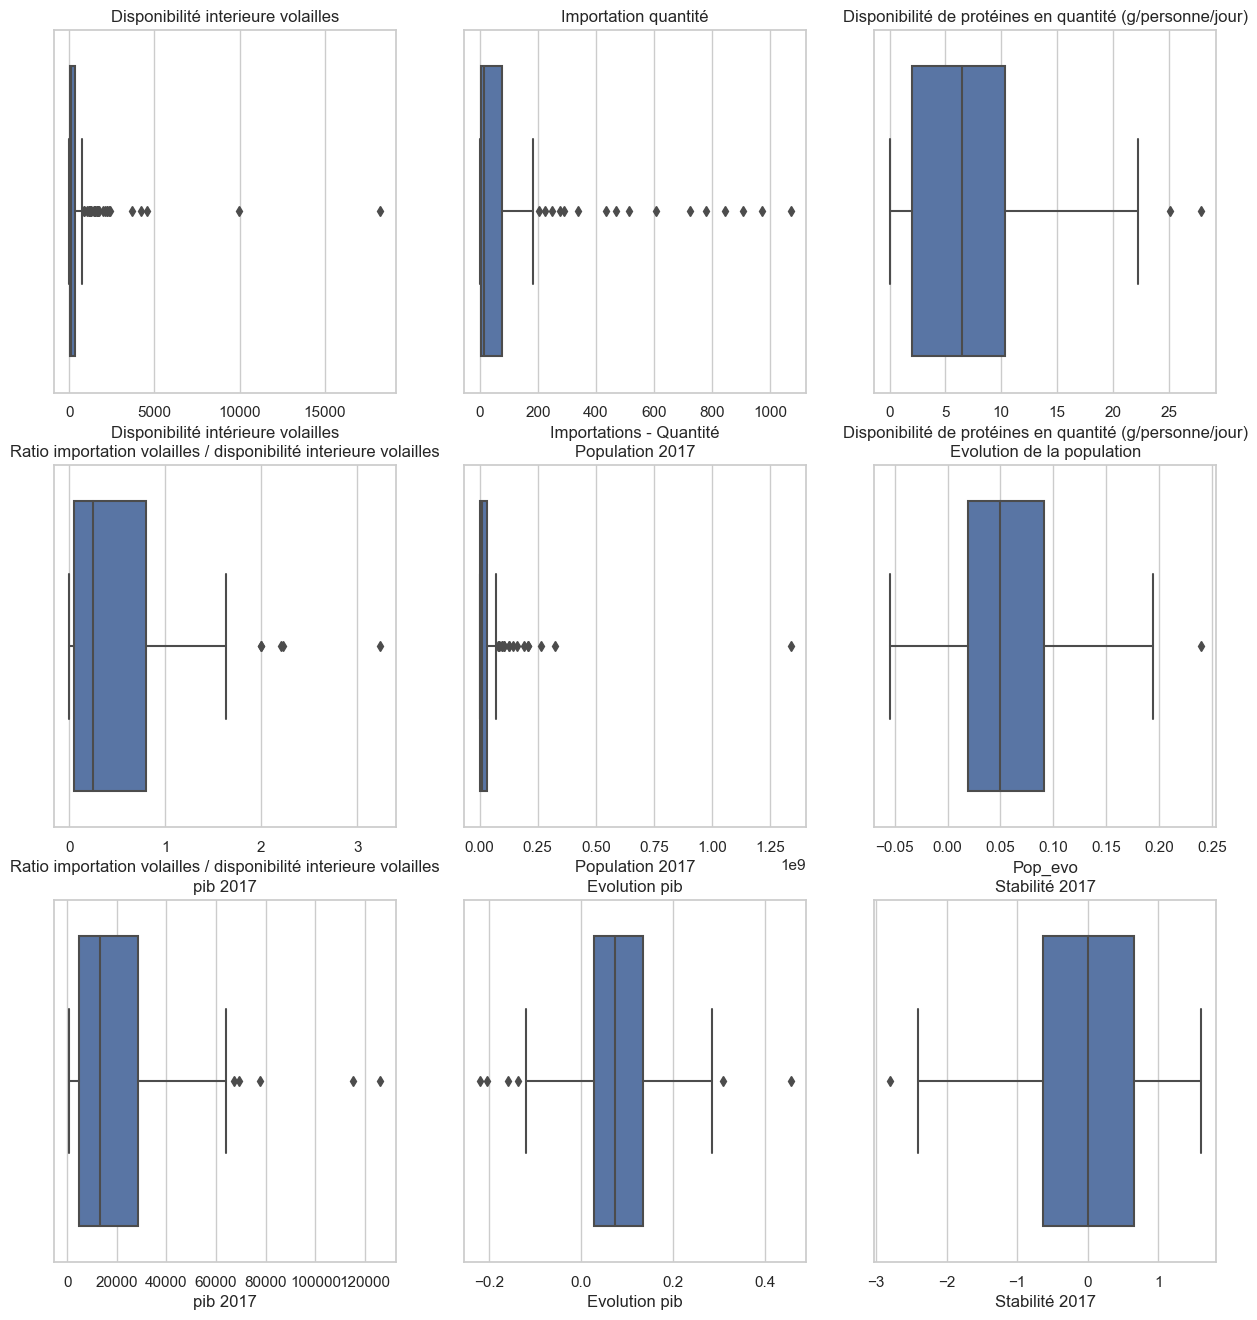

In [393]:
plt.figure(figsize=(15, 16))
sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=Complete, x='Disponibilité intérieure volailles')
plt.title('Disponibilité interieure volailles')

plt.subplot(332)
sns.boxplot(data=Complete, x='Importations - Quantité')
plt.title('Importation quantité')

plt.subplot(333)
sns.boxplot(data=Complete, x='Disponibilité de protéines en quantité (g/personne/jour)')
plt.title('Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(334)
sns.boxplot(data=Complete, x='Ratio importation volailles / disponibilité interieure volailles')
plt.title('Ratio importation volailles / disponibilité interieure volailles')

plt.subplot(335)
sns.boxplot(data=Complete, x='Population 2017')
plt.title('Population 2017')

plt.subplot(336)
sns.boxplot(data=Complete, x='Pop_evo')
plt.title('Evolution de la population')

plt.subplot(337)
sns.boxplot(data=Complete, x='pib 2017')
plt.title('pib 2017')

plt.subplot(338)
sns.boxplot(data=Complete, x='Evolution pib')
plt.title('Evolution pib')

plt.subplot(339)
sns.boxplot(data=Complete, x='Stabilité 2017')
plt.title('Stabilité 2017')

plt.show()

In [394]:
Complete['Population 2017'] = np.log(Complete['Population 2017'])
display(Complete[:10])

,Zone,Disponibilité intérieure volailles,Importations - Quantité,Disponibilité de protéines en quantité (g/personne/jour),Ratio importation volailles / disponibilité interieure volailles,Population 2017,Pop_evo,pib 2017,Evolution pib,Stabilité 2017
0,Afghanistan,57.0,29.0,0.54,0.508772,17.407221,0.124778,2058.4,-0.027451,-2.80
1,Afrique du Sud,2118.0,514.0,14.11,0.242682,17.858733,0.061889,13860.3,-0.014631,-0.28
2,Albanie,47.0,38.0,6.26,0.808511,14.874747,-0.006757,12771.0,0.124079,0.38
3,Algérie,277.0,2.0,1.97,0.007220,17.538530,0.085187,11737.4,0.036955,-0.92
4,Allemagne,1739.0,842.0,7.96,0.484186,18.230227,0.018282,53071.5,0.062403,0.59
5,Angola,319.0,277.0,3.60,0.868339,17.210581,0.146103,7310.9,-0.101987,-0.38
6,Antigua-et-Barbuda,7.0,7.0,17.77,1.000000,11.466106,0.042725,19840.3,0.124536,0.75
7,Arabie saoudite,1435.0,722.0,15.57,0.503136,17.315079,0.101461,47306.2,-0.011332,-0.64
8,Argentine,1962.0,8.0,13.53,0.004077,17.598271,0.041262,23597.1,-0.033860,0.17
9,Arménie,47.0,35.0,5.44,0.744681,14.895548,0.016290,12115.1,0.133174,-0.62


Le logarithme permet de rapprocher des valeurs extrêmes pour obtenir des  distributions moins étendus.
c'est utile pour la variable population.

# K-MEANS

In [395]:

complete_scaled = preprocessing.StandardScaler().fit_transform(Complete.iloc[:,1:])
pd.DataFrame(complete_scaled).describe().round(2).iloc[1:3:, : ] # POur verfier le scale on verfie que mean est a 0 et std a 1

,0,1,2,3,4,5,6,7,8
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Determiner le nombres de cluster

### Methode du coude

In [396]:
intertia = []     # Liste pour stocker les inertie

k_list = range(1, 11) #Definir une liste avec le nombre de cluster a tester
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [397]:
#pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :
for i in k_list :              
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(complete_scaled) 
  intertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Methode du coude')

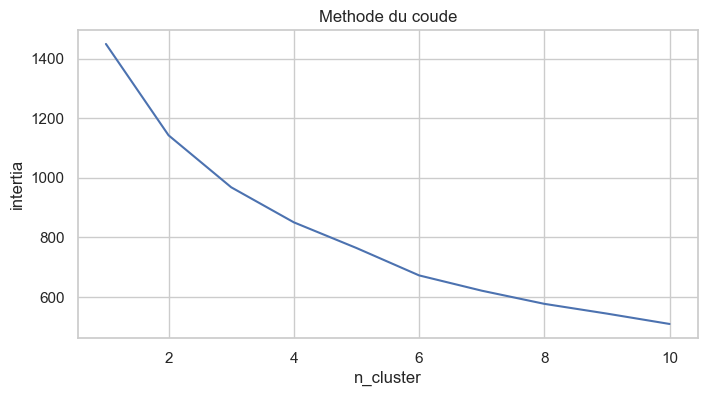

In [398]:
#Liste d'inertie obtenue pour 10 cluster
 
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)
plt.title("Methode du coude")

### Methode  silhouette


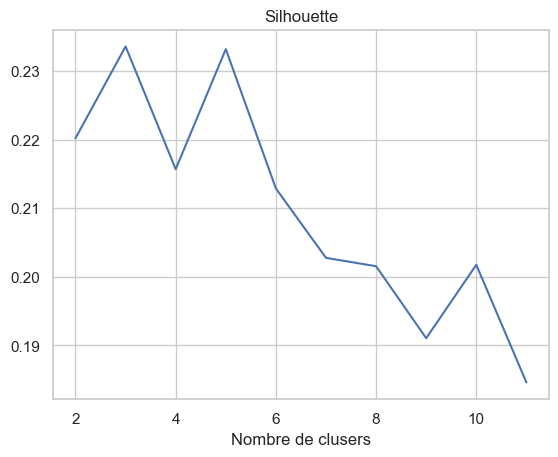

In [399]:
idx = ["mean", "std"]
pd.DataFrame(complete_scaled).describe().round(2).loc[idx, :]
res = np.arange(10,dtype="double")                                   #On fait varrier le nombre de clusters de 2 à 11
for k in np.arange(10):
    km = KMeans(n_clusters=k+2)
    km.fit(complete_scaled)
    res[k] = metrics.silhouette_score(complete_scaled,km.labels_)
plt.title("Silhouette")
plt.xlabel("Nombre de clusers")
plt.plot(np.arange(2,12,1),res)


### score de davies Bouldin

In [400]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(complete_scaled)
    db_index = davies_bouldin_score(complete_scaled, labels)
    results.update({i: db_index})

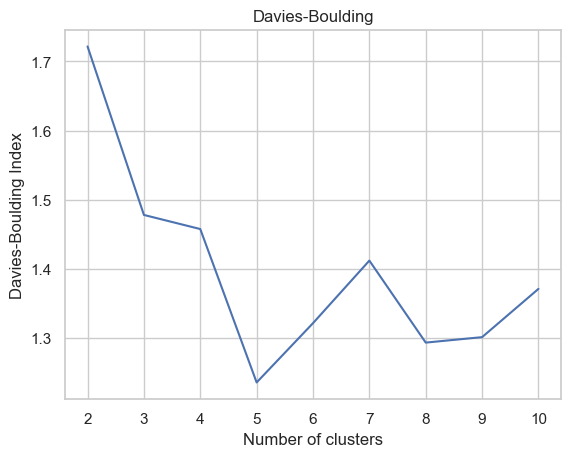

In [401]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.title("Davies-Boulding")
plt.show()

- La méthode "Silouhette" : Le coefficient de silouhette est la différence entre la distance moyenne avec les points du même groupe (cohésion) et la distance moyenne avec les points des groupes voisins (séparation). Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. Plus il est proche de 1 plus la classification sera bonne. Cette méthode semble indiquer que le nombre de classes optimal est 5, avec en seconde position 6 selon les itérations.  

- La méthode du "coude": On représente graphiquement la relation entre le nombre de clusters et la somme des carrés internes (Within Cluster Sum of Squares (WCSS)) puis on sélectionne le nombre de clusters pour lequel le changement de WCSS commence à s'applatir. Cette méthode indique plutôt que le nombre de cluster optimal est entre 4 et 6.*  

- Davies-Bouldin Index: Il se base sur les même principes de cohésion et de séparation que ci dessus mais plus il est bas plus le model sera optimisé. Il est minimal à 5.

In [402]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42).fit(complete_scaled) # 
#display(complete_scaled[:10])

k_labels = kmeans.labels_  # recuperation des clusters
#print(k_labels)
pd.DataFrame(Complete)["cluster_Km"] = kmeans.labels_   
Complete["cluster_Km"] = Complete["cluster_Km"].apply(str)
display(Complete[:10])


,Zone,Disponibilité intérieure volailles,Importations - Quantité,Disponibilité de protéines en quantité (g/personne/jour),Ratio importation volailles / disponibilité interieure volailles,Population 2017,Pop_evo,pib 2017,Evolution pib,Stabilité 2017,cluster_Km
0,Afghanistan,57.0,29.0,0.54,0.508772,17.407221,0.124778,2058.4,-0.027451,-2.80,1
1,Afrique du Sud,2118.0,514.0,14.11,0.242682,17.858733,0.061889,13860.3,-0.014631,-0.28,3
2,Albanie,47.0,38.0,6.26,0.808511,14.874747,-0.006757,12771.0,0.124079,0.38,2
3,Algérie,277.0,2.0,1.97,0.007220,17.538530,0.085187,11737.4,0.036955,-0.92,1
4,Allemagne,1739.0,842.0,7.96,0.484186,18.230227,0.018282,53071.5,0.062403,0.59,3
5,Angola,319.0,277.0,3.60,0.868339,17.210581,0.146103,7310.9,-0.101987,-0.38,0
6,Antigua-et-Barbuda,7.0,7.0,17.77,1.000000,11.466106,0.042725,19840.3,0.124536,0.75,2
7,Arabie saoudite,1435.0,722.0,15.57,0.503136,17.315079,0.101461,47306.2,-0.011332,-0.64,3
8,Argentine,1962.0,8.0,13.53,0.004077,17.598271,0.041262,23597.1,-0.033860,0.17,2
9,Arménie,47.0,35.0,5.44,0.744681,14.895548,0.016290,12115.1,0.133174,-0.62,2


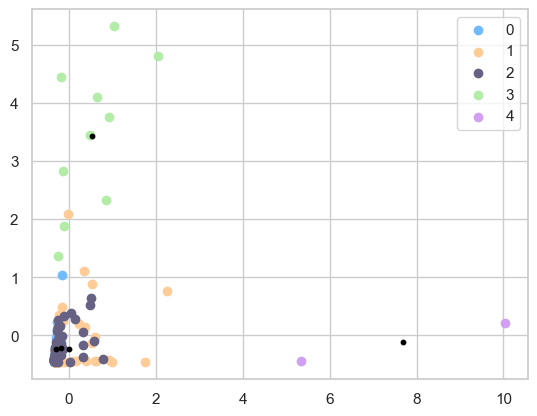

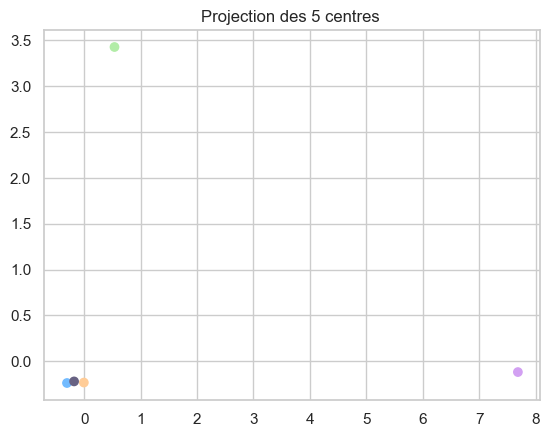

In [403]:

unique_label = list(kmeans.labels_)
labels = np.unique(unique_label)
centroids_km = kmeans.cluster_centers_


# Graphique sans acp
for couleur, i in  zip(["#72bbff","#ffcc97","#676283","#b2eca7","#d2a0f2","#0abdc0", "#fddfee","#fc4e60" ],[0,1,2,3,4,5,6,7,8]):
    filtered_label = complete_scaled[km.labels_ [i]]
    plt.scatter(complete_scaled[kmeans.labels_ == i , 0], complete_scaled[kmeans.labels_ ==i ,1], c=couleur)
#  for j ,txt in enumerate(text):
#       plt.annotate( text[j], (acp_km[j,0], acp_km[j, 1]))
plt.scatter(centroids_km[:,0],centroids_km[:,1], s = 10, c='black')
plt.legend(labels)
plt.show()


centroids_km = kmeans.cluster_centers_
plt.scatter(centroids_km[:,0],centroids_km[:,1], c=["#72bbff","#ffcc97","#676283","#b2eca7","#d2a0f2"])
plt.title("Projection des {} centres ".format(len(centroids_km)))
plt.show()


,cluster_Km,Disponibilité intérieure volailles,Importations - Quantité,Disponibilité de protéines en quantité (g/personne/jour),Ratio importation volailles / disponibilité interieure volailles,Population 2017,Pop_evo,pib 2017,Evolution pib,Stabilité 2017
0,0,55.548387,40.935484,4.331935,0.898055,14.594724,0.103186,9043.441935,-0.004976,-0.059032
1,1,581.732143,41.875000,3.406071,0.142753,17.233904,0.078773,7631.025000,0.104492,-0.830714
2,2,276.870968,44.161290,10.805323,0.451392,14.904702,0.016630,32921.040323,0.099357,0.601129
3,3,1537.600000,718.400000,11.802000,1.040009,17.349639,0.034873,45433.260000,0.053367,0.317000
4,4,14124.000000,63.000000,17.805000,0.003517,19.375923,0.030631,37219.700000,-0.009647,-0.090000


'clus0 = Complete.loc[Complete["cluster_Km"]== \'5\']\nclus1 = Complete.loc[Complete["cluster_Km"]== \'0\']\ndisplay(clus0, clus0.shape, clus1, clus1.shape)'

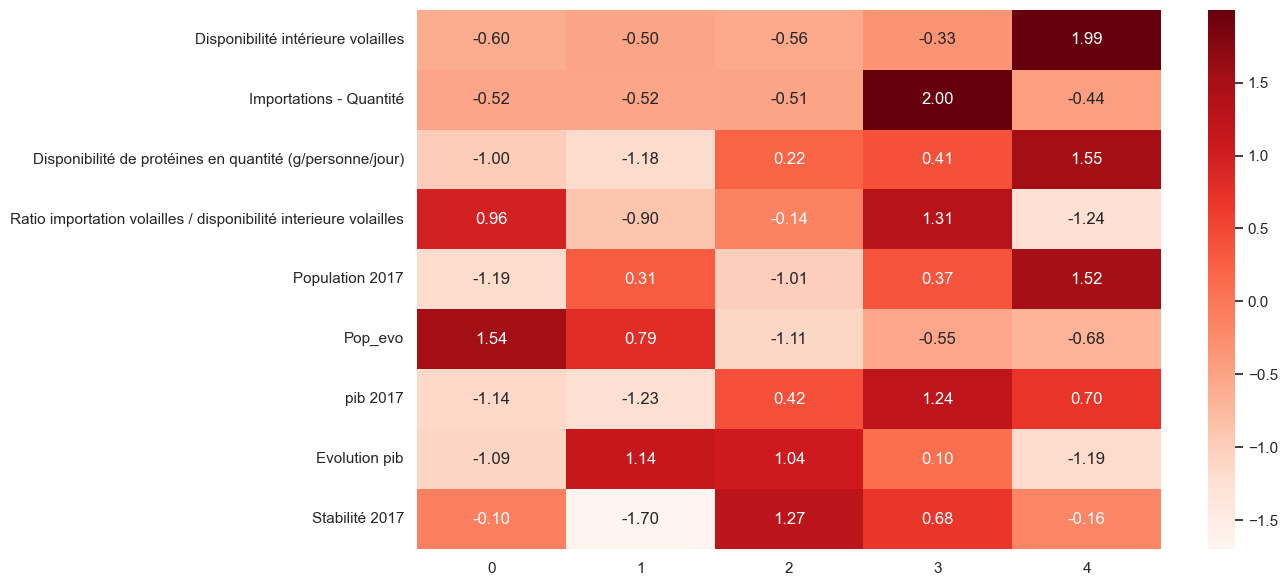

In [404]:
centroides = Complete.groupby(["cluster_Km"]).mean().reset_index()
display(centroides)

plt.figure(figsize=(12,7))
map_centroides= preprocessing.StandardScaler().fit_transform(centroides.iloc[:,1:])
map_centroides= pd.DataFrame(map_centroides)
map_centroides =map_centroides.T
map_centroides.index = centroides.columns[1:]
sns.heatmap(map_centroides, annot=True, cmap="Reds", fmt="0.2f")
'''clus0 = Complete.loc[Complete["cluster_Km"]== '5']
clus1 = Complete.loc[Complete["cluster_Km"]== '0']
display(clus0, clus0.shape, clus1, clus1.shape)'''

In [405]:
#display(Complete[:10])

# classification ascendante hiérarchique (CAH)

Text(0.5, 1.0, 'Dendrogramme')

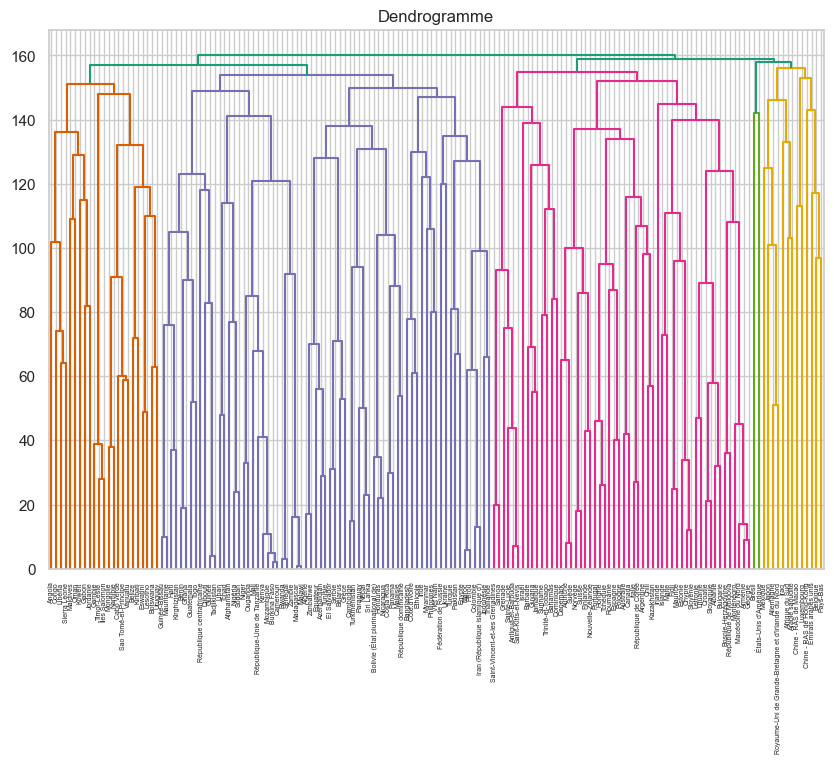

In [406]:
sns.set(style="whitegrid", palette="Dark2")

complete_scaled_d = preprocessing.StandardScaler().fit_transform(Complete.iloc[:,1:]) #
ward = AgglomerativeClustering(linkage='ward',compute_full_tree=True).fit(complete_scaled)
dendro = [ ]
plt.figure(figsize=(10, 7))
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), (len(dendro)+1)])


dendrogram(dendro, labels=list(Complete["Zone"]), color_threshold=157, show_leaf_counts=True,orientation="top",)
plt.title("Dendrogramme")

In [407]:
#Isoler les groupes CAH
Complete["cluster_cah"] = fcluster(dendro,t=156,criterion='distance')
cluster_cah = fcluster(dendro,t=156,criterion='distance')
Complete["cluster_cah"] = Complete["cluster_cah"].apply(str)

Complete.info()
display(Complete["cluster_cah"].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Zone                                                              161 non-null    object 
 1   Disponibilité intérieure volailles                                161 non-null    float64
 2   Importations - Quantité                                           161 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)          161 non-null    float64
 4   Ratio importation volailles / disponibilité interieure volailles  161 non-null    float64
 5   Population 2017                                                   161 non-null    float64
 6   Pop_evo                                                           161 non-null    float64
 7   pib 2017                           

5

## Comparaison entre la CAH et le k_means

In [408]:
#Correspondance avec les groupes de la CAH
crosstab = pd.crosstab(Complete["cluster_cah"],Complete["cluster_Km"])
#display(crosstab)
crosstab

cluster_Km,0,1,2,3,4
cluster_cah,,,,,
1,22,0,1,0,0
2,8,54,7,0,0
3,1,1,52,0,0
4,0,0,0,0,2
5,0,1,2,10,0


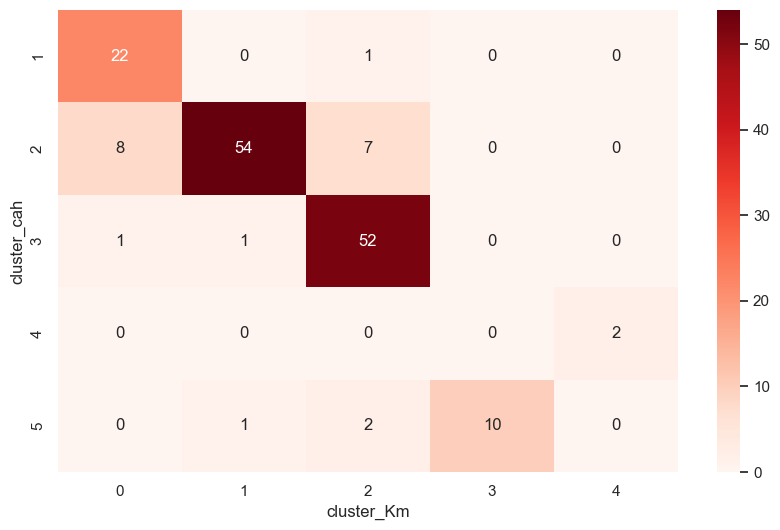

In [409]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax = sns.heatmap(data = crosstab, cmap="Reds", annot=True)

In [410]:
iso3 = pd.read_csv('./sources/countries-codes.csv', sep=';')
#Complete["cluster_Km"] = fcluster(dendro,t=155,criterion='distance')
#cluster_cah = fcluster(dendro,t=150,criterion='distance')
palette = ["#b2eca7","#ffcc97","#676283","#72bbff","#d2a0f2","#0abdc0"]
Complete["cluster_Km"] = Complete["cluster_Km"].apply(str)
iso3 = iso3.rename(columns={'LABEL FR': 'Zone'})
iso3 = iso3[['Zone', 'ISO3 CODE']]
complete_visu = pd.merge(Complete, iso3, on='Zone', how='left')
#complete_visu.info()
px.choropleth(complete_visu, locations="ISO3 CODE",
                    color="cluster_Km",
                    hover_name="Zone",
                    #color_discrete_sequence=px.colors.qualitative.Palette,
                    color_discrete_sequence= palette,
                    basemap_visible=True,
                    title= "Répartition géographiques des clusters obtenus avec K_means"
)

In [411]:
iso3 = pd.read_csv('./sources/countries-codes.csv', sep=';')
#Complete["cluster_Km"] = fcluster(dendro,t=155,criterion='distance')
#cluster_cah = fcluster(dendro,t=150,criterion='distance')
palette = ["#b2eca7","#ffcc97","#676283","#72bbff","#d2a0f2","#0abdc0"]
Complete["cluster_cah"] = Complete["cluster_cah"].apply(str)
iso3 = iso3.rename(columns={'LABEL FR': 'Zone'})
iso3 = iso3[['Zone', 'ISO3 CODE']]
complete_visu = pd.merge(Complete, iso3, on='Zone', how='left')
#complete_visu.info()
px.choropleth(complete_visu, locations="ISO3 CODE",
                    color="cluster_cah",
                    hover_name="Zone",
                    #color_discrete_sequence=px.colors.qualitative.Palette,
                     color_discrete_sequence= palette,
                    basemap_visible=True,
                    title= "Répartition géographiques des clusters obtenus avec CAH")

# ACP


[29.9 20.9 15.4 10.6  7.   5.9  5.   3.6  1.7]


Text(0.5, 1.0, 'Eboulis des valeurs propres')

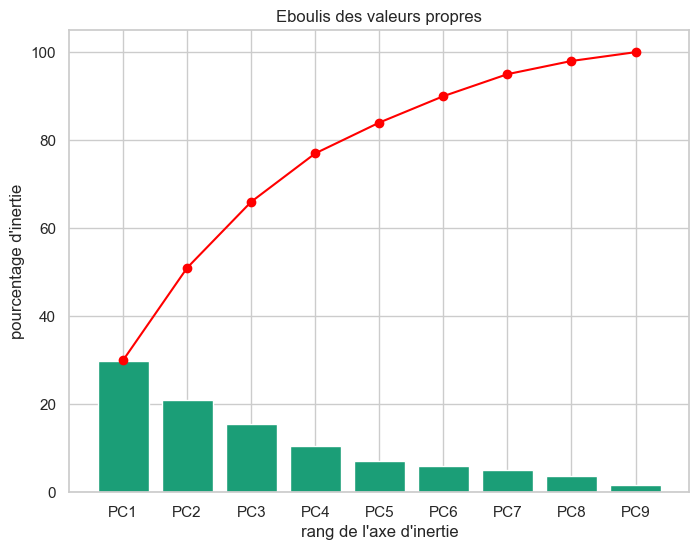

In [412]:
pca = PCA()
pca.fit(complete_scaled) 
pca_data = pca.transform(complete_scaled) # génere les coordonées graphique
var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
scree = var.cumsum().round()
labels = ['PC' + str(x) for x in range(1, len(var) + 1)] # variance expliquer en '%' pour chaque composante principal 
print(var) 

# Bar plot du pourcentage de variance expliqué par pc 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(var) + 1), scree, c="red",marker='o')
plt.bar(x=range(1, len(var) + 1), height=var, tick_label=labels)
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")

In [413]:
n_components = 9
'''pca = PCA(n_components=n_components)
pca.fit(complete_scaled)
'''
pcs = pca.components_
#pcs

In [414]:
x_list = range(1, n_components+1)
list(x_list)
pcs = pd.DataFrame(pcs)
pcs


,0,1,2,3,4,5,6,7,8
0,0.019616,0.178738,0.451154,0.281036,-0.323394,-0.337051,0.446310,-0.018356,0.517137
1,0.562423,0.371063,0.191624,-0.321239,0.549948,-0.195578,0.216194,0.081672,-0.109426
2,0.087000,0.409750,0.002996,0.389773,0.067401,0.484182,0.099822,-0.641437,-0.110554
3,-0.299706,0.560363,-0.325543,0.420441,0.168555,-0.099891,-0.013409,0.521219,-0.056415
4,0.503239,-0.003322,0.285450,0.419764,-0.241480,-0.121684,-0.591237,0.149470,-0.209842
5,0.447669,-0.334618,-0.242874,0.247554,0.028808,0.495444,0.341454,0.385736,0.235956
6,-0.256509,0.149736,0.630748,-0.211192,-0.087905,0.540412,0.018156,0.368505,-0.182862
7,0.105127,0.337460,-0.140433,-0.326054,-0.075067,0.226697,-0.470482,0.002817,0.686038
8,0.235366,0.316517,-0.309384,-0.317383,-0.698222,-0.005193,0.236830,0.054260,-0.318426


In [415]:
features = Complete.columns[:-2]
features= features[1:]


pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité intérieure volailles,Importations - Quantité,Disponibilité de protéines en quantité (g/personne/jour),Ratio importation volailles / disponibilité interieure volailles,Population 2017,Pop_evo,pib 2017,Evolution pib,Stabilité 2017
F1,0.02,0.18,0.45,0.28,-0.32,-0.34,0.45,-0.02,0.52
F2,0.56,0.37,0.19,-0.32,0.55,-0.20,0.22,0.08,-0.11
F3,0.09,0.41,0.00,0.39,0.07,0.48,0.10,-0.64,-0.11
F4,-0.30,0.56,-0.33,0.42,0.17,-0.10,-0.01,0.52,-0.06
F5,0.50,-0.00,0.29,0.42,-0.24,-0.12,-0.59,0.15,-0.21
F6,0.45,-0.33,-0.24,0.25,0.03,0.50,0.34,0.39,0.24
F7,-0.26,0.15,0.63,-0.21,-0.09,0.54,0.02,0.37,-0.18
F8,0.11,0.34,-0.14,-0.33,-0.08,0.23,-0.47,0.00,0.69
F9,0.24,0.32,-0.31,-0.32,-0.70,-0.01,0.24,0.05,-0.32


In [416]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9
Disponibilité intérieure volailles,0.019616,0.562423,0.087000,-0.299706,0.503239,0.447669,-0.256509,0.105127,0.235366
Importations - Quantité,0.178738,0.371063,0.409750,0.560363,-0.003322,-0.334618,0.149736,0.337460,0.316517
Disponibilité de protéines en quantité (g/personne/jour),0.451154,0.191624,0.002996,-0.325543,0.285450,-0.242874,0.630748,-0.140433,-0.309384
Ratio importation volailles / disponibilité interieure volailles,0.281036,-0.321239,0.389773,0.420441,0.419764,0.247554,-0.211192,-0.326054,-0.317383
Population 2017,-0.323394,0.549948,0.067401,0.168555,-0.241480,0.028808,-0.087905,-0.075067,-0.698222
Pop_evo,-0.337051,-0.195578,0.484182,-0.099891,-0.121684,0.495444,0.540412,0.226697,-0.005193
pib 2017,0.446310,0.216194,0.099822,-0.013409,-0.591237,0.341454,0.018156,-0.470482,0.236830
Evolution pib,-0.018356,0.081672,-0.641437,0.521219,0.149470,0.385736,0.368505,0.002817,0.054260
Stabilité 2017,0.517137,-0.109426,-0.110554,-0.056415,-0.209842,0.235956,-0.182862,0.686038,-0.318426


<AxesSubplot:>

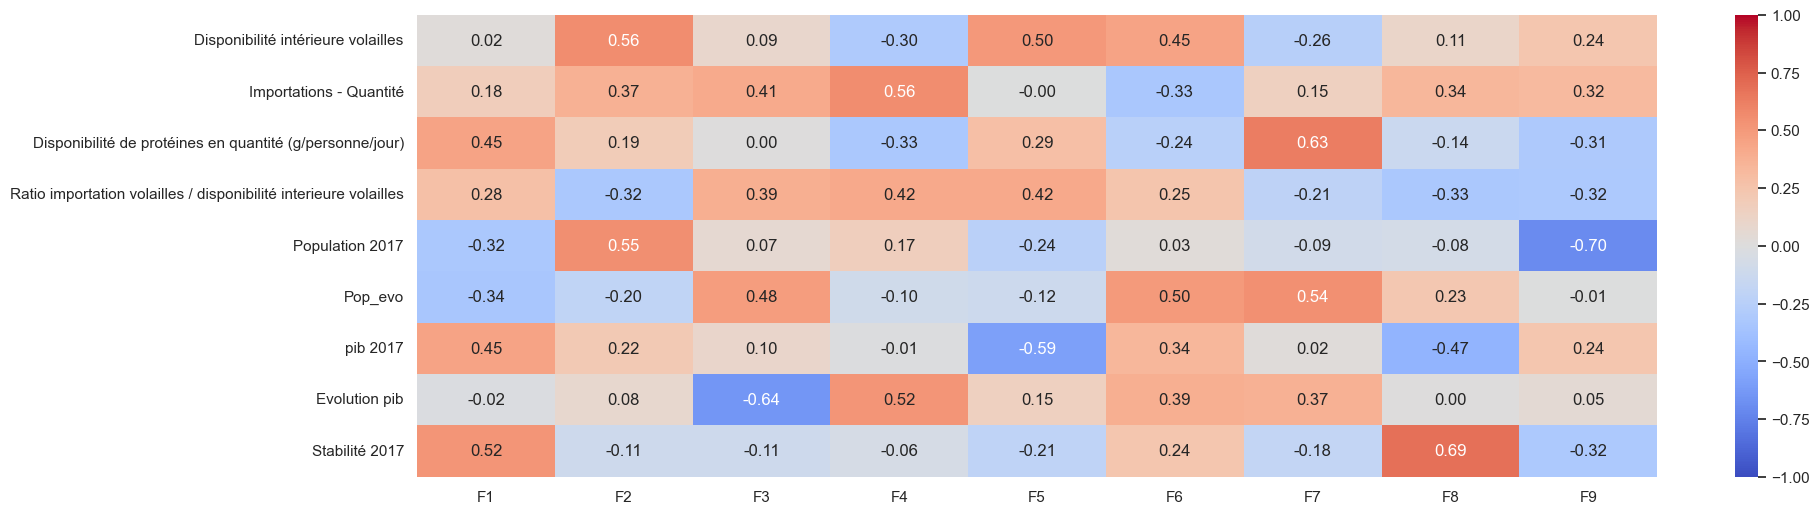

In [417]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [418]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)

    fig, ax = plt.subplots(figsize=(9, 7))
  
    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.05,
                head_length=0.05, 
                width=0.01, color='r')

        # Les labels

        plt.text(pca.components_[x, i]+ 0.05 ,
                pca.components_[y, i] + 0.05,
                features[i])
      
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))


    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display

    plt.axis('equal')
   
    plt.show(block=False)

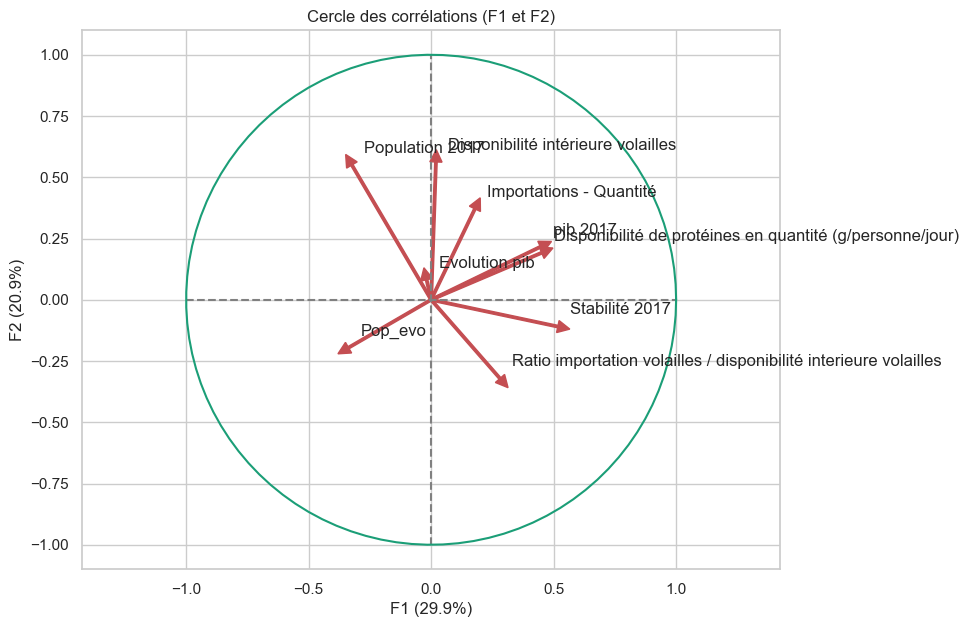

In [419]:
x_y = (0,1)
correlation_graph(pca, x_y, features)


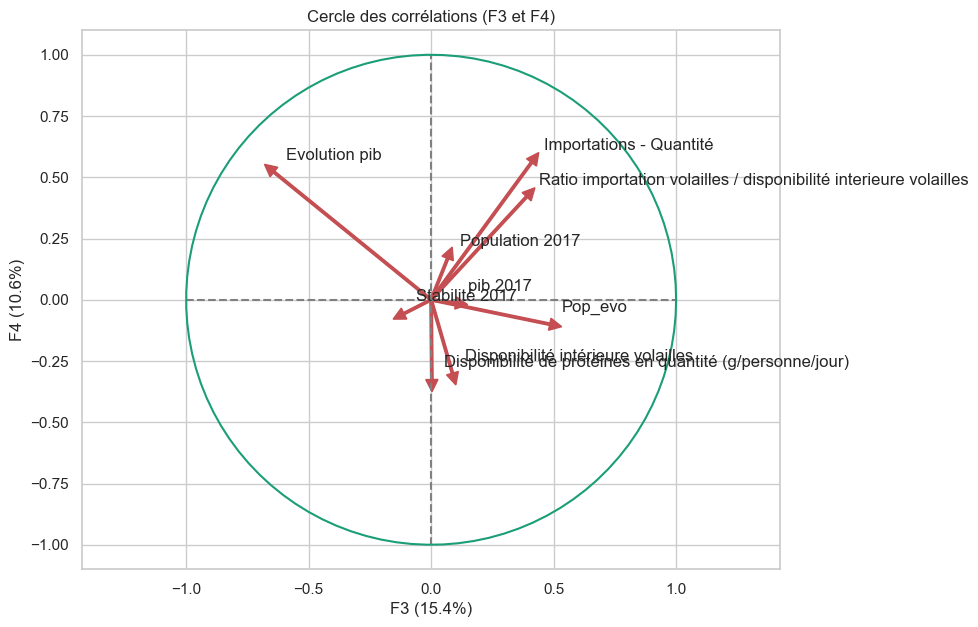

In [420]:
x_y=(2,3)
correlation_graph(pca, x_y, features)

In [421]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                               figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    palette = ["#b2eca7","#ffcc97","#676283","#72bbff","#d2a0f2"]#,"#0abdc0"]

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    #plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
     #                    c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette=palette)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='7', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

   


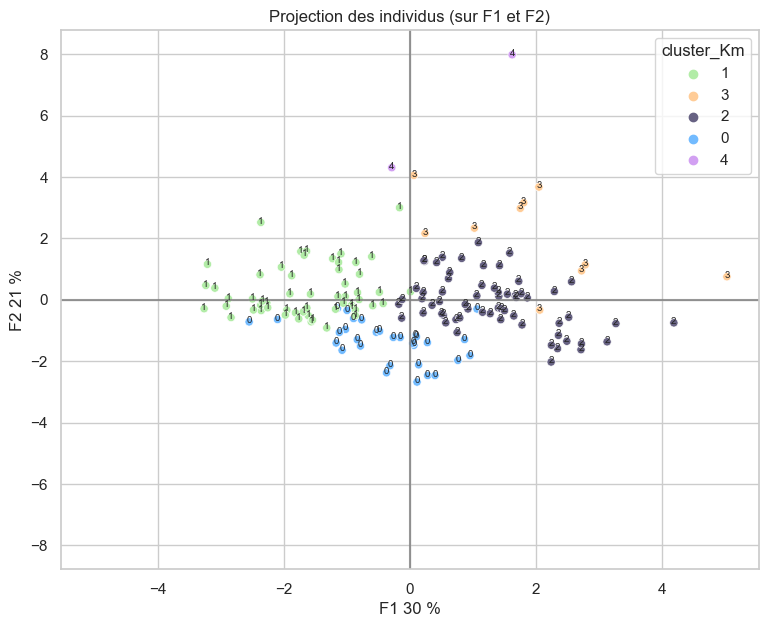

In [422]:
# Choix du nombre de composantes à calculer (on prend large ici afin de reduire à l'interpretation ne garder que les 3 premieres)
n_comp = 6

x_y = [0,1]
display_factorial_planes(pca_data, x_y, pca, labels=Complete['cluster_Km'], figsize=(9,7), clusters=Complete['cluster_Km'], marker="o")
plt.show()

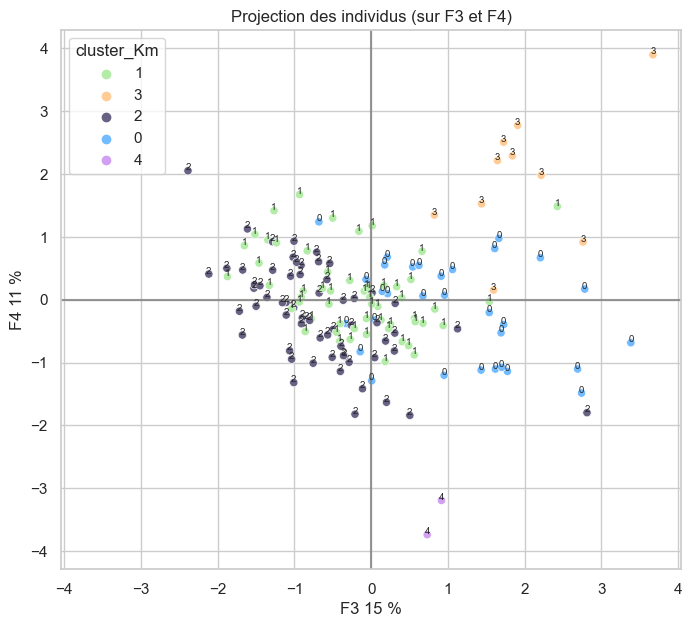

In [423]:


x_y = [2,3]
display_factorial_planes(pca_data, x_y, pca, labels=Complete['cluster_Km'],  figsize=(8,7), clusters=Complete['cluster_Km'], marker="o")
plt.show()

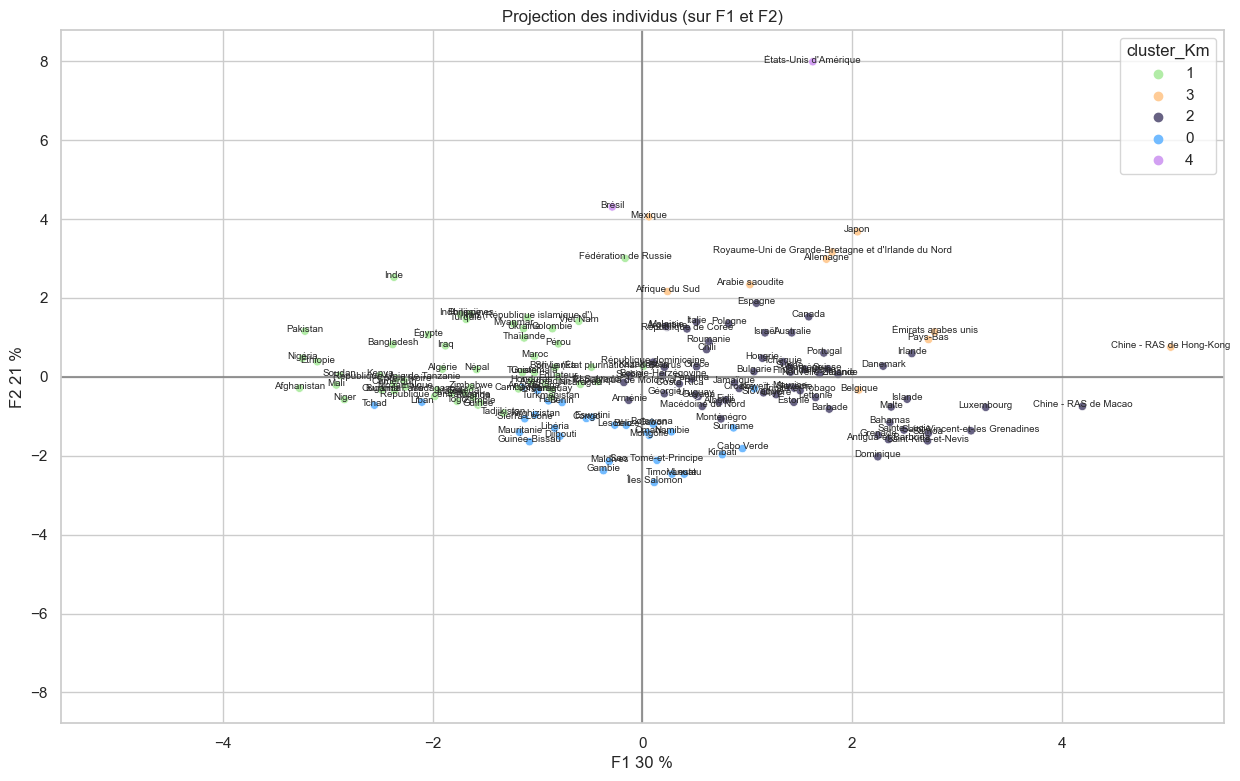

In [424]:
n_comp = 6

x_y = [0,1]
display_factorial_planes(pca_data, x_y, pca, labels=Complete['Zone'], figsize=(15,9), clusters=Complete['cluster_Km'], marker="o")

plt.show()

POur les cluster 1 et 4 le ratio d'importation de volailles par rapport a la disponibilité interieur est tres faible. Ce qui laisse penser
que ce sont des pays qui consomme leurs propre production.


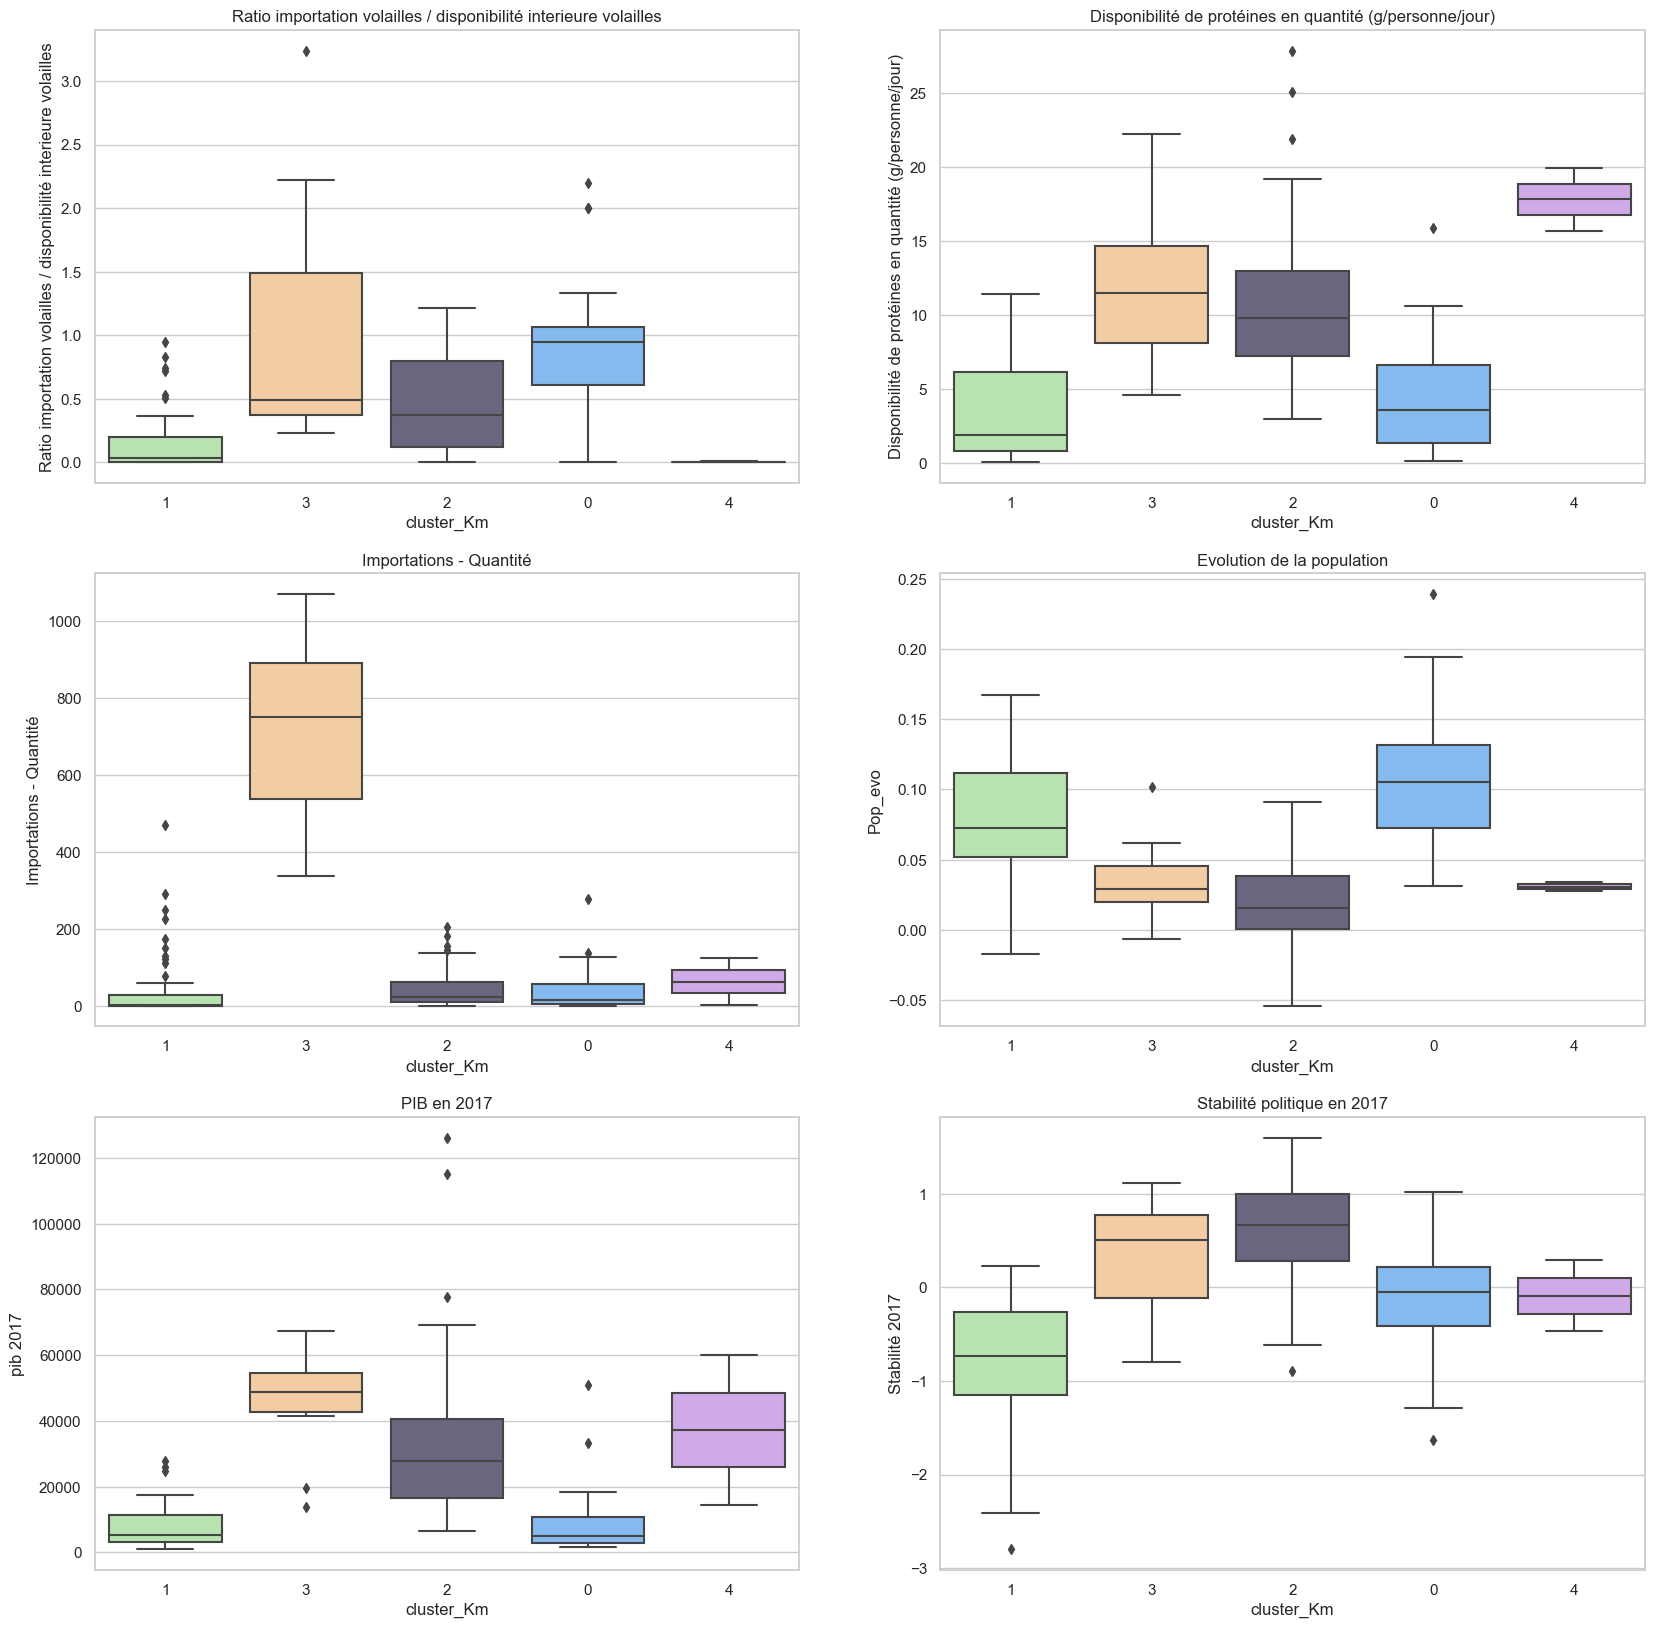

In [425]:

#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid", palette=palette)

plt.subplot(321)
sns.boxplot(data=Complete, x='cluster_Km', y='Ratio importation volailles / disponibilité interieure volailles')
plt.title('Ratio importation volailles / disponibilité interieure volailles')

plt.subplot(322)
sns.boxplot(data=Complete, x='cluster_Km', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.title('Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(323)
sns.boxplot(data=Complete, x='cluster_Km', y='Importations - Quantité')
plt.title('Importations - Quantité')

plt.subplot(324)
sns.boxplot(data=Complete, x='cluster_Km', y='Pop_evo')
plt.title('Evolution de la population')

plt.subplot(325)
sns.boxplot(data=Complete, x='cluster_Km', y='pib 2017')
plt.title('PIB en 2017')

plt.subplot(326)
sns.boxplot(data=Complete, x='cluster_Km', y='Stabilité 2017')
plt.title('Stabilité politique en 2017')

plt.show()

Text(0.5, 1.0, 'Evolutioin PIB')

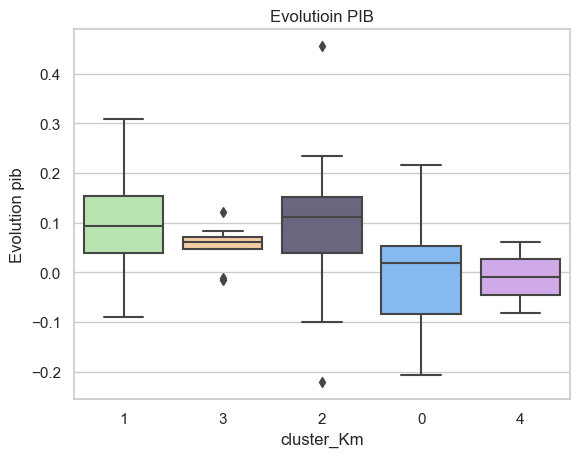

In [426]:
sns.boxplot(data=Complete, x='cluster_Km', y='Evolution pib')
plt.title('Evolutioin PIB')

In [427]:
Complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Zone                                                              161 non-null    object 
 1   Disponibilité intérieure volailles                                161 non-null    float64
 2   Importations - Quantité                                           161 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)          161 non-null    float64
 4   Ratio importation volailles / disponibilité interieure volailles  161 non-null    float64
 5   Population 2017                                                   161 non-null    float64
 6   Pop_evo                                                           161 non-null    float64
 7   pib 2017                           

In [428]:
centroides = Complete.groupby(["cluster_Km"]).mean().reset_index()
display(centroides)

#clus0 = Complete.loc[Complete["cluster_Km"]== '2']
clus2 = Complete.loc[Complete["cluster_Km"]== '3']
clus2 = Complete.loc[Complete["cluster_cah"]== '5']
display( clus2, clus2.shape)

,cluster_Km,Disponibilité intérieure volailles,Importations - Quantité,Disponibilité de protéines en quantité (g/personne/jour),Ratio importation volailles / disponibilité interieure volailles,Population 2017,Pop_evo,pib 2017,Evolution pib,Stabilité 2017
0,0,55.548387,40.935484,4.331935,0.898055,14.594724,0.103186,9043.441935,-0.004976,-0.059032
1,1,581.732143,41.875000,3.406071,0.142753,17.233904,0.078773,7631.025000,0.104492,-0.830714
2,2,276.870968,44.161290,10.805323,0.451392,14.904702,0.016630,32921.040323,0.099357,0.601129
3,3,1537.600000,718.400000,11.802000,1.040009,17.349639,0.034873,45433.260000,0.053367,0.317000
4,4,14124.000000,63.000000,17.805000,0.003517,19.375923,0.030631,37219.700000,-0.009647,-0.090000


,Zone,Disponibilité intérieure volailles,Importations - Quantité,Disponibilité de protéines en quantité (g/personne/jour),Ratio importation volailles / disponibilité interieure volailles,Population 2017,Pop_evo,pib 2017,Evolution pib,Stabilité 2017,cluster_Km,cluster_cah
1,Afrique du Sud,2118.0,514.0,14.11,0.242682,17.858733,0.061889,13860.3,-0.014631,-0.28,3,5
4,Allemagne,1739.0,842.0,7.96,0.484186,18.230227,0.018282,53071.5,0.062403,0.59,3,5
7,Arabie saoudite,1435.0,722.0,15.57,0.503136,17.315079,0.101461,47306.2,-0.011332,-0.64,3,5
16,Belgique,152.0,338.0,4.57,2.223684,16.250855,0.023825,50442.3,0.046421,0.43,3,5
31,Chine - RAS de Hong-Kong,280.0,907.0,22.26,3.239286,15.804251,0.030689,59842.2,0.083517,0.83,3,5
32,Chine - RAS de Macao,19.0,23.0,11.90,1.210526,13.341635,0.078308,126144.0,-0.221199,1.43,2,5
65,Iraq,566.0,470.0,5.37,0.830389,17.441258,0.132573,10526.4,0.035024,-2.31,1,5
71,Japon,2415.0,1069.0,7.24,0.442650,18.663648,-0.006324,41444.2,0.047375,1.11,3,5
83,Luxembourg,11.0,11.0,7.19,1.000000,13.291110,0.090958,114986.0,0.017116,1.33,2,5
94,Mexique,4219.0,972.0,9.26,0.230386,18.642041,0.050074,19721.3,0.060262,-0.80,3,5


(13, 12)